In [309]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import matplotlib.dates as mdates
import scipy
from datetime import datetime
from matplotlib.backends.backend_pdf import PdfPages

## Number of Tweets by City

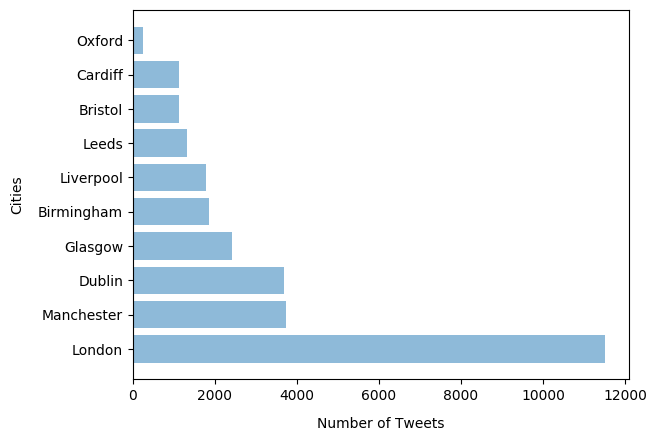

In [70]:
cities = ['London', 'Manchester', 'Dublin', 'Glasgow', 'Birmingham', 'Liverpool', 'Leeds', 'Bristol', 'Cardiff', 'Oxford']
no_of_tweets = [11517, 3741, 3699, 2423, 1862, 1791, 1329, 1134, 1122, 258]

y_pos = np.arange(len(cities))
 
mpl.style.use('default')

f = plt.figure()
plt.barh(y_pos, no_of_tweets, align='center', alpha=0.5)
plt.yticks(y_pos, cities)
plt.xlabel('Number of Tweets', labelpad=10)
plt.ylabel('Cities', labelpad=10)

plt.show()

f.savefig("num_tweets_by_city.pdf", bbox_inches='tight')


## Number of Articles Per Day

In [274]:
dates = pd.date_range(start="2019-12-25",end="2020-03-25").tolist()
for i, date in enumerate(dates):
    dates[i] = date.strftime("%Y-%m-%d")

df = pd.read_csv('../data/news.csv', index_col=0, parse_dates=True, infer_datetime_format=True)
df

# Get counts per data
counts = pd.to_datetime(df['date_published']).dt.date.value_counts()
raw_indexes = counts.index
indexes = []

# Convert date indexes into strings
for i, index in enumerate(raw_indexes):
    indexes.append(index.strftime("%Y-%m-%d"))

final_counts = []

# Gather number of articles for each date
for date in dates:
    if date in final_indexes:
        index = indexes.index(date)
        final_counts.append(counts[index])
    else:
        final_counts.append(0)

for i, date in enumerate(dates):
    dates[i] = datetime.strptime(date, '%Y-%m-%d').date()

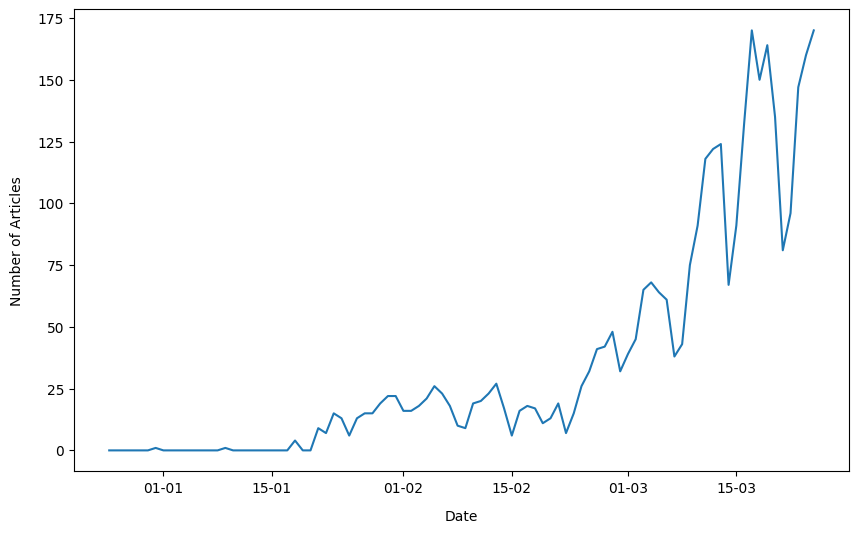

In [319]:
f = plt.figure(figsize=(10,6))
ax = f.gca()


formatter = mdates.DateFormatter("%d-%m")
ax.xaxis.set_major_formatter(formatter)
# locator = mdates.DayLocator()
# ax.xaxis.set_major_locator(mdates.WeekdayLocator())

plt.xlabel('Date', labelpad=10)
plt.ylabel('Number of Articles', labelpad=10)

plt.plot(dates, final_counts)
plt.show()

f.savefig("num_articles_by_date.pdf", bbox_inches='tight')
